In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

With linear regression we aim to fit a line (or hyperplane in higher dimensions) to a dataset. 
Regression in general may be performed for a variety of reasons: 

- to produce a so-called trend line (or curve) that can be used to help visually summarize, drive home a particular point about the
data under study, or
- to learn a model so that precise predictions can be made regarding output values in the future

## 1.  Linear Regression

*Linear regression* attempts to model the relationship between two variables ($x$ and $y$) by fitting a linear equation $y = \theta_1 x+\theta_0$ to observed data.

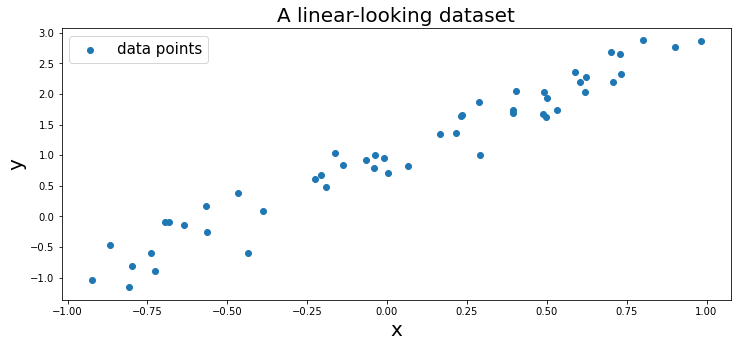

In [7]:
'This cell generates (and plots) a linear-looking dataset, based on the equation y=2x+1'

# generate the dataset
m = 50 # number of points
x = -1 + 2*np.random.rand(m,1) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m,1) # y = 2x+1 + small random noise

# plot the dataset
fig, ax = plt.subplots(figsize=(12,5)) # figure size
ax.scatter(x,y, label='data points') # plot the data
ax.set_xlabel('x',fontsize=20) # set x-axis label
ax.set_ylabel('y',fontsize=20) # set y-axis label
ax.set_title('A linear-looking dataset',fontsize=20) # set title
ax.legend(fontsize=15) # plot legend

The plot shows that the two variables $x$ and $y$ are roughly correlated: the larger $x$ is, the larger $y$ is.
We can quantify this by attempting to fit a linear model

$$
y = \theta_1 x+\theta_0,
$$

where $\theta_0$ is the bias (intercept) and $\theta_1$ is the slope.

In order to find a good linear model for our data, we need a measure of how well (or poorly) a model fits the data.
The most common performance measure is the **Root Mean Squared Error** (MSE):

$$
\mathrm{MSE} = \sqrt{ \frac{1}{m}\sum_{i=1}^m\left(y_i - (\theta_1 x_i+\theta_0) \right)^2}
$$


In [8]:
# import the linear regression model from the sci-kit learn library
from sklearn.linear_model import LinearRegression
# instantiate the model
linreg = LinearRegression()
# fit the linear regression model to the data
linreg.fit(x,y)

LinearRegression()

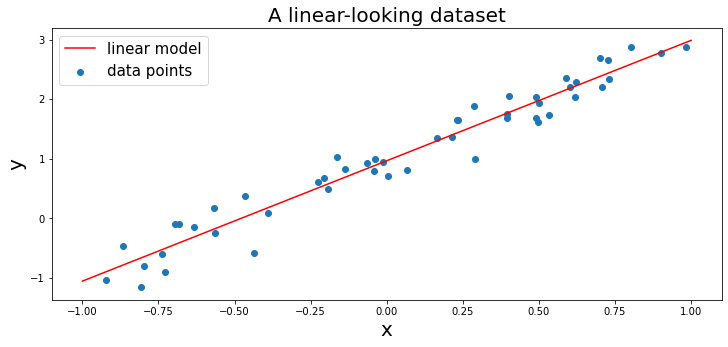

In [12]:
# plot the linear regression model (only for 2 dimensional data)
m = 100
x_plot = np.linspace(-1,1,m).reshape(100,1)
y_plot = linreg.predict(x_plot)

fig, ax = plt.subplots(figsize=(12,5)) # figure size
ax.plot(x_plot,y_plot, c='red', label='linear model')

# plot the dataset
ax.scatter(x,y, label='data points') # plot the data
ax.set_xlabel('x',fontsize=20) # set x-axis label
ax.set_ylabel('y',fontsize=20) # set y-axis label
ax.set_title('A linear-looking dataset',fontsize=20) # set title
ax.legend(fontsize=15) # plot legend

## 2. Multivariate Linear Regression

### Form of Linear Regression

A linear model assumes that there is a linear relation between the variable $y$ and the features $x_i$

$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$,

where:

$y$ is the response 

$\theta_0$ is the **bias** (aka the intercept)

$\theta_1$ is the **coefficient** for $x_1$ (the first feature)

$\theta_2$ is the **coefficient** for $x_2$ (the second feature)

$\vdots$

$\theta_n$ is the **coefficient** for $x_n$ (the nth feature)

The model coefficients $\theta_i$ are "learned" during the model fitting step using the "least squares" criterion. 
Then, the fitted model can be used to make predictions!

### Training a linear model

To train a linear model, one needs to find the model coefficients $\theta_i$ that minimize the **Root Mean Square Error (RMSE)**

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\widehat{y}_i- y_i\right)^2}
$$

where the $y_i$ values are the actual values of the response variable, and the $\hat{y}_i$ values are the predicted values

### Example: Sales Prediction

In [13]:
# load the data
url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
sales = pd.read_csv(url, index_col=0)
sales.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
    
What is the **response**?

- **Sales**: sales of a single product in a given market (in thousands of items)

### Visualize the relationship between the features and the response

A scatterplot can help determine if two variables are related in some systematic way.

Text(0, 0.5, 'Sales')

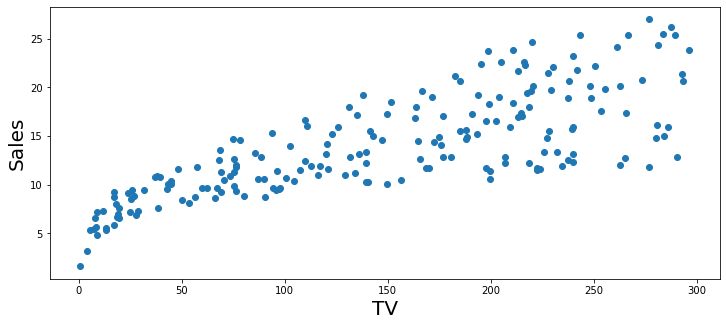

In [14]:
plt.figure(figsize=(12,5))
plt.plot(sales['TV'],sales['Sales'],'o')
plt.xlabel('TV', fontsize=20)
plt.ylabel('Sales', fontsize=20)

Text(0, 0.5, 'Sales')

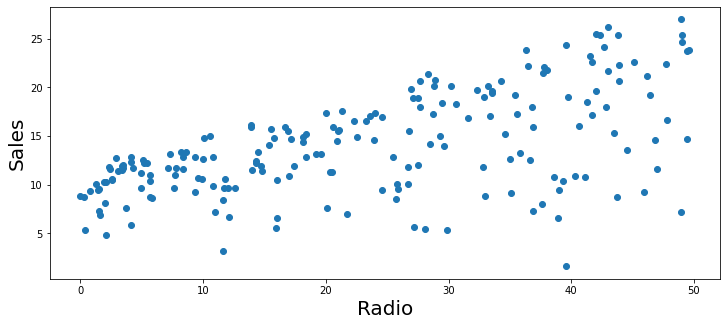

In [15]:
plt.figure(figsize=(12,5))
plt.plot(sales['Radio'],sales['Sales'],'o')
plt.xlabel('Radio', fontsize=20)
plt.ylabel('Sales', fontsize=20)

Text(0, 0.5, 'Sales')

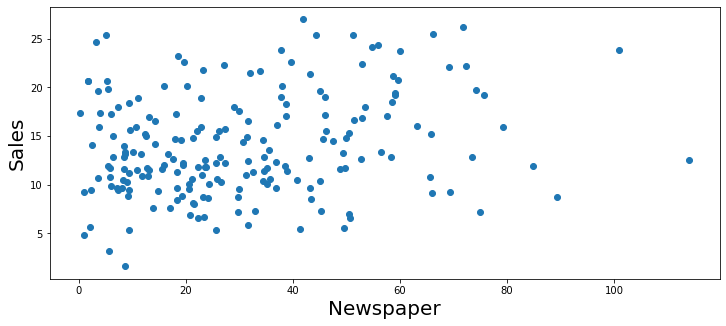

In [16]:
plt.figure(figsize=(12,5))
plt.plot(sales['Newspaper'],sales['Sales'],'o')
plt.xlabel('Newspaper', fontsize=20)
plt.ylabel('Sales', fontsize=20)

**Goal:** Train a linear model which predicts sales based on the money spent on different platforms for marketing.

$y = \theta_0 + \theta_1 \times \mathrm{TV} + \theta_2 \times \mathrm{Radio} + \theta_3 \times \mathrm{Newspaper}$

### Linear Regression in scikit-learn

In [17]:
# feature matrix X / target vector y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = sales[feature_cols]
y = sales.Sales

In [18]:
# train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
from sklearn.linear_model import LinearRegression

# initialize
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting linear regression coefficients

In [20]:
# coefficients
print(linreg.coef_)

[ 0.04510077  0.1939383  -0.00110815]


In [21]:
# pair the feature names with the coefficients
coeffs = pd.DataFrame(linreg.coef_, feature_cols, columns=['coefficient'])
coeffs

,coefficient
TV,0.045101
Radio,0.193938
Newspaper,-0.001108


<AxesSubplot:>

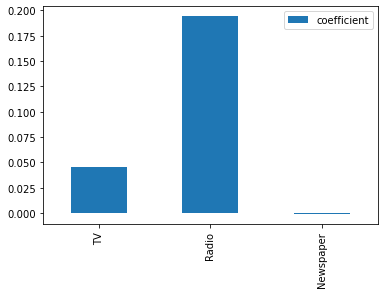

In [22]:
coeffs.plot(kind='bar')

In [23]:
# bias term
linreg.intercept_

2.924367133569092

How do we interpret the TV coefficient (0.0461)?

- For a given amount of Radio and Newspaper ad spending, a "unit" (1000 dollars) increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.

### Making predictions

In [24]:
y_test_pred = linreg.predict(X_test)
y_test_pred

array([23.22038283, 17.4966649 ,  8.65739149, 20.31358062, 15.3118242 ,
       15.03769639, 14.63580426, 18.4590291 , 15.13349486,  7.89187125,
       12.71721532,  8.99262778, 12.50852497,  7.92487188, 13.23818713,
        8.78764446, 16.34707928, 20.92929298, 21.57496401, 19.65394881,
       24.13691251, 13.85554271, 10.09024085, 19.77550665, 14.20841495,
       11.85279596, 22.92974747,  8.70923547,  6.87762306,  9.11692499,
        6.15229557,  7.40869986,  6.50881588,  3.56439389,  7.68766343,
       22.00917146,  9.95667494, 18.51482914, 12.44072274, 10.73197259,
       12.67028424, 14.71470439, 12.00190914, 14.34422768, 23.45071895,
       18.08729064,  9.86398501, 13.47510408, 12.70373719,  6.53156658])

### Model evaluation 

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

where

- $n$ is the size of the dataset
- $\hat{y}_i$ is the prediction for $y_i$

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

On average, the predictions are off by 2000 dollars.

### Visualize the prediction (only for small datasets)

Text(0, 0.5, 'predicted')

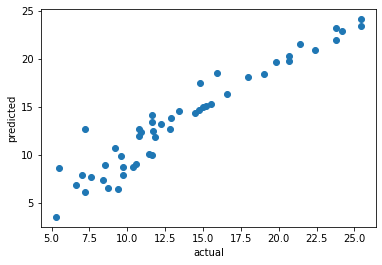

In [25]:
# plot predicted values against observed values
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('actual')
plt.ylabel('predicted')

### Adding polynomial features

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [28]:
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=3,include_bias=False)),
    ('reg', linreg)
])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', LinearRegression())])

In [30]:
# original features
feature_cols

['TV', 'Radio', 'Newspaper']

In [31]:
# polynomial features
poly_features_names = pipe['poly_features'].get_feature_names(feature_cols)
poly_features_names

['TV',
 'Radio',
 'Newspaper',
 'TV^2',
 'TV Radio',
 'TV Newspaper',
 'Radio^2',
 'Radio Newspaper',
 'Newspaper^2',
 'TV^3',
 'TV^2 Radio',
 'TV^2 Newspaper',
 'TV Radio^2',
 'TV Radio Newspaper',
 'TV Newspaper^2',
 'Radio^3',
 'Radio^2 Newspaper',
 'Radio Newspaper^2',
 'Newspaper^3']

In [32]:
# pair the feature names with the coefficients
coeffs = pd.DataFrame(pipe['reg'].coef_,poly_features_names, columns=['coefficient'])
coeffs 

,coefficient
TV,8.758167e-02
Radio,4.875949e-02
Newspaper,4.111365e-02
TV^2,-4.297559e-04
TV Radio,1.528687e-03
TV Newspaper,-3.421712e-04
Radio^2,-1.620011e-03
Radio Newspaper,-1.079930e-04
Newspaper^2,-6.168730e-04
TV^3,7.416088e-07


<AxesSubplot:>

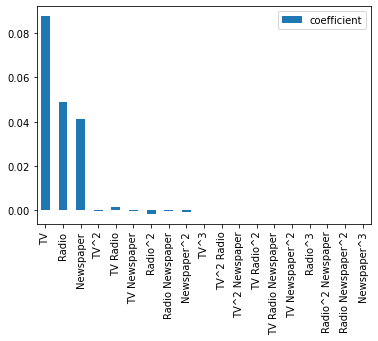

In [33]:
coeffs.plot(kind='bar')

In [34]:
y_test_pred = pipe.predict(X_test)

Text(0, 0.5, 'predicted')

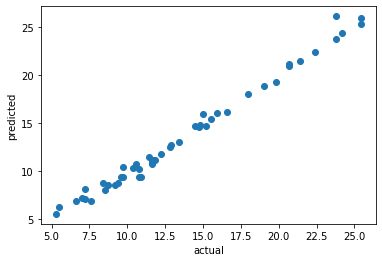

In [35]:
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('actual')
plt.ylabel('predicted')